In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [76]:
df=pd.read_csv('walmart_sales.csv')
df.tail(20)

,Year,Value
19,1999,280
20,2000,300
21,2001,340
22,2002,380
23,2003,410
24,2004,440
25,2005,490
26,2006,550
27,2007,580
28,2008,650


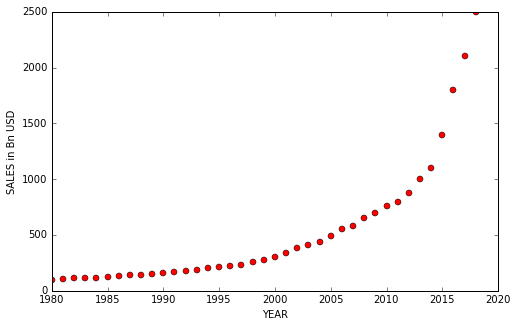

In [15]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('SALES in Bn USD')
plt.xlabel('YEAR')
plt.show()

In [16]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.]


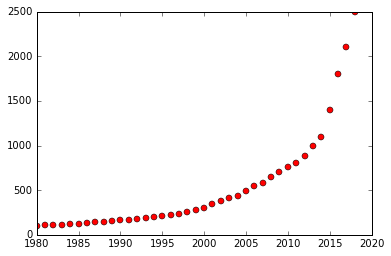

In [52]:
beta_1 = 394.293372
beta_2 = 0.997454

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)
print(Y_pred)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred)
plt.plot(x_data, y_data, 'ro')

In [65]:
# Lets normalize our data
xnorm =x_data/max(x_data)
ynorm =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xnorm, ynorm)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 394.293372, beta_2 = 0.997454


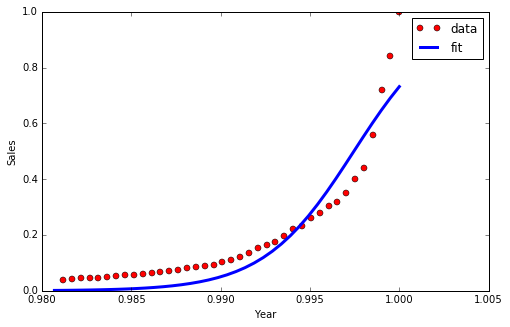

In [63]:
x = np.linspace(1980, 2019, 39)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xnorm, ynorm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.show()

In [77]:
print(sigmoid(2007/max(x_data), *popt)*max(y_data))

603.380368599
